Fabrycki Łukasz 82623

**Laboratorium 13**

Zaimplementuj w Google Colab w bibliotece PyTorch program z wykorzystaniem tensorów, w
którym obliczysz pole okręgu na podstawie algorytmu Monte Carlo. Program powinien
posiadać 2 wersje -> na CPU i GPU. Przestaw różnice w czasie obliczeń w zależności od
rozmiaru problemu (liczby losowanych punktów) dla CPU i GPU w postaci wykresów oraz
wniosków.
Zrealizuj pracę w postaci sprawozdania w Google Colab – dokonaj także opisu programów i
zrealizowanych czynności – ma to mieć postać tutoriala dla osoby, która nie na związku z
przedmiotem.
1.5p


In [ ]:
import torch
import time

def calc_area_monte_carlo(n_points, radius, device):
    points = torch.rand(n_points, 2, device=device) * radius
    dist = torch.sqrt(torch.sum(points**2, dim=1))
    in_circle = (dist <= radius).sum().item()
    area = (in_circle / n_points) * (radius**2 * 4)
    return area

num_points = 10000000
circle_radius = 20
start = time.time()
area_cpu = calc_area_monte_carlo(num_points, circle_radius, "cpu")
end = time.time()
elapsed = end - start
print(f'Czas obliczeń CPU: {elapsed}')
print(f'Pole okręgu o promieniu {circle_radius} obliczone z wykorzystaniem CPU: {area_cpu}')

Ten kod oblicza pole okręgu za pomocą metody Monte Carlo. Tworzy on losowe punkty (z użyciem biblioteki torch) i określa, ile z nich znajduje się wewnątrz okręgu. Następnie, stosując stosunek punktów wewnątrz okręgu do wszystkich punktów, oblicza pole okręgu. Kod mierzy też czas, jaki upłynął na obliczenia na CPU.

In [ ]:
import torch
import time

def monte_carlo_circle_area(n_points, radius,device):
    points = torch.rand(n_points, 2,device=device)
    
    points = points * radius
    distances = torch.sqrt(points[:, 0]**2 + points[:, 1]**2)
    in_circle = (distances <= radius).sum().item()
    area = (in_circle / n_points) * (radius**2 * 4)
    return area
n_points = 10000000
radius = 20
start = time.time()
area_gpu = monte_carlo_circle_area(n_points, radius,"cuda")
koniec = time.time()
czas = koniec-start
print(f'Czas obliczeń GPU: {czas}')
print(f'Pole okręgu o promieniu {circle_radius} obliczone z wykorzystaniem GPU: {area_gpu}')

Kod oblicza pole koła za pomocą metody Monte Carlo z wykorzystaniem biblioteki PyTorch. Funkcja monte_carlo_circle_area generuje losowe punkty na płaszczyźnie 2D, sprawdza, czy znajdują się one wewnątrz koła o określonym promieniu, a następnie oblicza stosunek punktów wewnątrz koła do całkowitej liczby punktów. Ten stosunek jest następnie mnożony przez pole koła, aby uzyskać szacunkowe pole. Kod korzysta z GPU (jeśli jest dostępne), aby przyspieszyć obliczenia, ustawiając device="cuda". Czas obliczeń i szacowane pole są wypisywane na ekranie.

**WARTOŚCI GPU:**

n_points: 1000000 
time: 0.0014905929565429688

n_points: 5000000
time: 0.003432035446166992

n_points: 10000000
time: 0.009438276290893555

**WARTOŚCI CPU:**

n_points: 1000000 
time: 0.0890200138092041

n_points: 5000000
time: 0.17293143272399902

n_points: 10000000
time: 0.30754899978637695


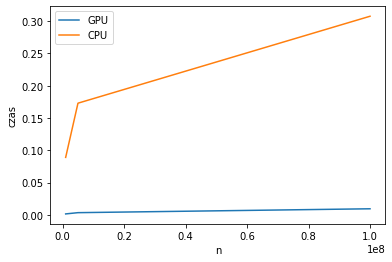

In [ ]:
import matplotlib.pyplot as plt

# ilsoc n
n_values = [1000000 , 5000000, 100000000]

# wartości dla GPU
gpu_values = [0.0014905929565429688, 0.003432035446166992, 0.009438276290893555]

# wartości dla CPU
cpu_values = [0.0890200138092041, 0.17293143272399902, 0.30754899978637695]

# rysowanie wykresu liniowego z wartościami DIM jako oś x i wartościami GPU i CPU jako oś y
plt.plot(n_values, gpu_values, label="GPU")
plt.plot(n_values, cpu_values, label="CPU")

# dodanie etykiet dla osi x i y
plt.xlabel("n")
plt.ylabel("czas")

# dodanie legendy
plt.legend()

# wyświetlenie wykresu
plt.show()

Wyniki pokazują, że proces obliczania powierzchni okręgu przy użyciu GPU jest szybszy niż przy użyciu CPU w każdym z trzech ilości n (1000000, 5000000, 100000000). Czas obliczenia dla GPU jest znacznie mniejszy niż dla CPU i maleje wraz ze wzrostem ilości n, co sugeruje, że GPU jest bardziej wydajne w przypadku obliczeń matematycznych.